In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime, timedelta
import helper as hp
plt.style.use('ggplot')

In [152]:
### Import Data to dataframe
data_path ='~/Desktop/capstone/data/Denver_1940_2010.csv'
raw_data_df = pd.read_csv(data_path, low_memory=False)
pprint(raw_data_df.columns)

Index(['STATION', 'NAME', 'DATE', 'ACMH', 'ACMH_ATTRIBUTES', 'ACSH',
       'ACSH_ATTRIBUTES', 'AWND', 'AWND_ATTRIBUTES', 'FMTM', 'FMTM_ATTRIBUTES',
       'PGTM', 'PGTM_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'PSUN',
       'PSUN_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES',
       'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES', 'TSUN', 'TSUN_ATTRIBUTES',
       'WDF1', 'WDF1_ATTRIBUTES', 'WDFG', 'WDFG_ATTRIBUTES', 'WDFM',
       'WDFM_ATTRIBUTES', 'WESD', 'WESD_ATTRIBUTES', 'WSF1', 'WSF1_ATTRIBUTES',
       'WSFG', 'WSFG_ATTRIBUTES', 'WSFM', 'WSFM_ATTRIBUTES', 'WT01',
       'WT01_ATTRIBUTES', 'WT02', 'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES',
       'WT04', 'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06',
       'WT06_ATTRIBUTES', 'WT07', 'WT07_ATTRIBUTES', 'WT08', 'WT08_ATTRIBUTES',
       'WT09', 'WT09_ATTRIBUTES', 'WT10', 'WT10_ATTRIBUTES', 'WT11',
       'WT11_ATTRIBUTES', 'WT14', 'WT

In [153]:
### Grab raw data columns
dates_r = hp.grab_datetime(raw_data_df)
PRCP_r = hp.grab_col_data(raw_data_df, 'PRCP')
TMAX_r = hp.grab_col_data(raw_data_df, 'TMAX')
TMIN_r = hp.grab_col_data(raw_data_df, 'TMIN')
SNWD_r = hp.grab_col_data(raw_data_df, 'SNWD')
SNOW_r = hp.grab_col_data(raw_data_df, 'SNOW')
WT16_r = hp.grab_col_data(raw_data_df, 'WT16')

In [155]:
###
PRCP_d = hp.GHCN_Data(PRCP_r, dates_r, *hp.trim_col_data(PRCP_r))
TMAX_d = hp.GHCN_Data(TMAX_r, dates_r, *hp.trim_col_data(TMAX_r))
TMIN_d = hp.GHCN_Data(TMIN_r, dates_r, *hp.trim_col_data(TMIN_r))
SNWD_d = hp.GHCN_Data(SNWD_r, dates_r, *hp.trim_col_data(SNWD_r))
SNOW_d = hp.GHCN_Data(SNOW_r, dates_r, *hp.trim_col_data(SNOW_r))
WT16_d = hp.GHCN_Data(WT16_r, dates_r, *hp.trim_col_data(WT16_r))
TMAX_d.set_data_by_year()
TMIN_d.set_data_by_year()
PRCP_d.set_data_by_year()
SNWD_d.set_data_by_year()
SNOW_d.set_data_by_year()
WT16_d.set_data_by_year()

In [88]:
def data_year_avg(ax, df, years, aggfx=np.nanmean):
    year_avg = []
    for year in years:
        year_avg.append(aggfx(df[year].values))
    ax.scatter(years, year_avg)
    return year_avg

def data_winter_avg(ax, df, years, aggfx=np.nanmean):
    winter_avg = []
    for year in years[1:]:
        avg = list(df[df['Month_id']==12][year-1].values)
        avg.extend(list(df[df['Month_id'].isin([1, 2])][year].values))
        winter_avg.append(aggfx(avg))
    ax.scatter(years[1:], winter_avg)
    return winter_avg

In [21]:
### Get Aggregates for each year
yrs = list(range(TMAX_d.startyr,TMAX_d.endyr))

winter_avg = data_winter_avg(4, TMAX_d.data_yr, yrs)
year_avg = data_year_avg(4, TMAX_d.data_yr, yrs)


In [22]:
from statsmodels.regression.linear_model import OLS

In [56]:
Y = winter_avg
X = np.ones((len(yrs),2))
X[:,0] = yrs
model = OLS(Y, X[1:,:])
results = model.fit()
wtr_params = results.params

In [70]:
Y = year_avg
X = np.ones((len(yrs),2))
X[:,0] = yrs
model = OLS(Y, X)
results = model.fit()
yr_params = results.params

In [84]:
print(results.t_test([1, 0], use_t=False))  #use_t = False for a normal distribtion model

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0208      0.008      2.447      0.014       0.004       0.037


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0208      0.008      2.447      0.017       0.004       0.038


No handles with labels found to put in legend.
No handles with labels found to put in legend.


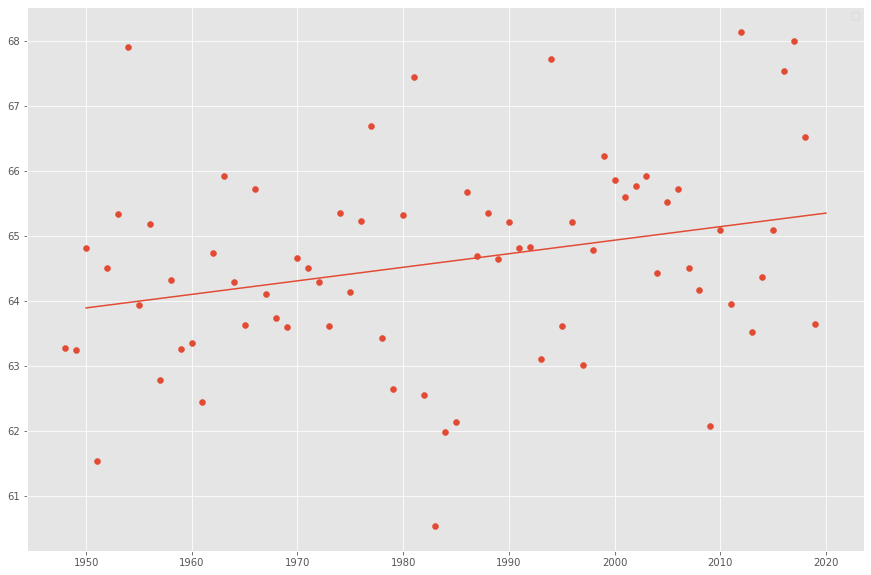

In [75]:
fig, ax = plt.subplots(1, figsize=(15,10))
r = list(range(TMAX_d.startyr,TMAX_d.endyr))

data_year_avg(ax, TMAX_d.data_yr, r) #, aggfx=np.nanmean)

X_mdl = np.linspace(1950,2020,100)
Y_mdl = X_mdl*yr_params[0] + yr_params[1]
ax.plot(X_mdl, Y_mdl)

ax.legend();
ax.legend();

No handles with labels found to put in legend.


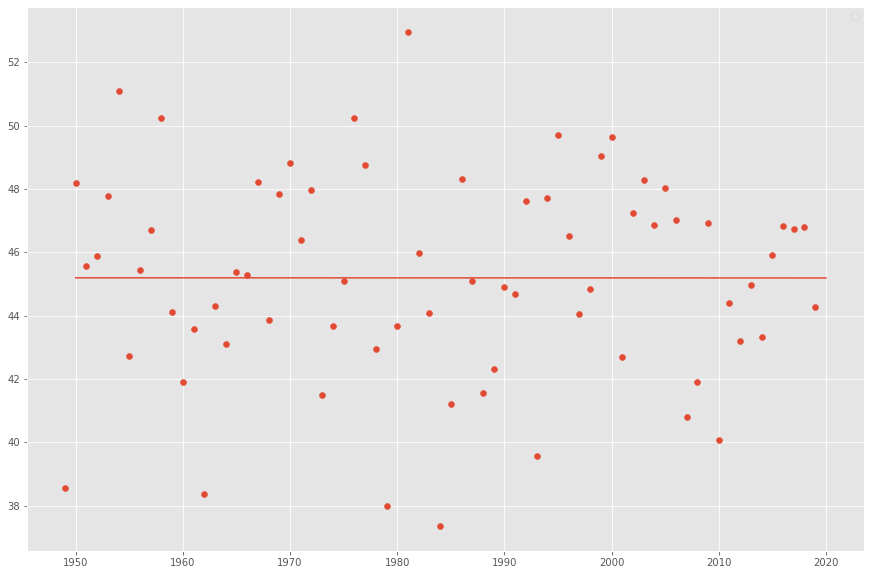

In [69]:
fig, ax = plt.subplots(1, figsize=(15,10))
r = list(range(TMAX_d.startyr,TMAX_d.endyr))

data_winter_avg(ax, TMAX_d.data_yr, r) #, aggfx=np.nanmean)

X_mdl = np.linspace(1950,2020,100)
Y_mdl = X_mdl*wtr_params[0] + wtr_params[1]
ax.plot(X_mdl, Y_mdl)

ax.legend();

No handles with labels found to put in legend.
No handles with labels found to put in legend.


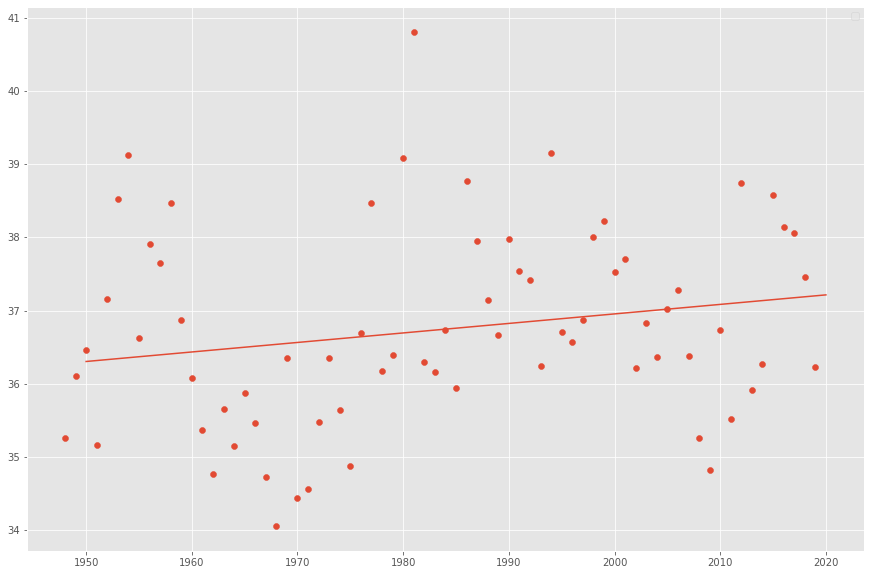

In [99]:
fig, ax = plt.subplots(1, figsize=(15,10))
yrs = list(range(TMAX_d.startyr,TMAX_d.endyr))

# Y = data_year_avg(ax, PRCP_d.data_yr, r, aggfx=np.nansum)
Y = data_year_avg(ax, TMIN_d.data_yr, r)

X = np.ones((len(yrs),2))
X[:,0] = yrs
model = OLS(Y, X)
results = model.fit()
params = results.params


X_mdl = np.linspace(1950,2020,100)
Y_mdl = X_mdl*params[0] + params[1]
ax.plot(X_mdl, Y_mdl)

ax.legend();
ax.legend();

In [100]:
results.t_test([1, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0130      0.007      1.737      0.087      -0.002       0.028

No handles with labels found to put in legend.


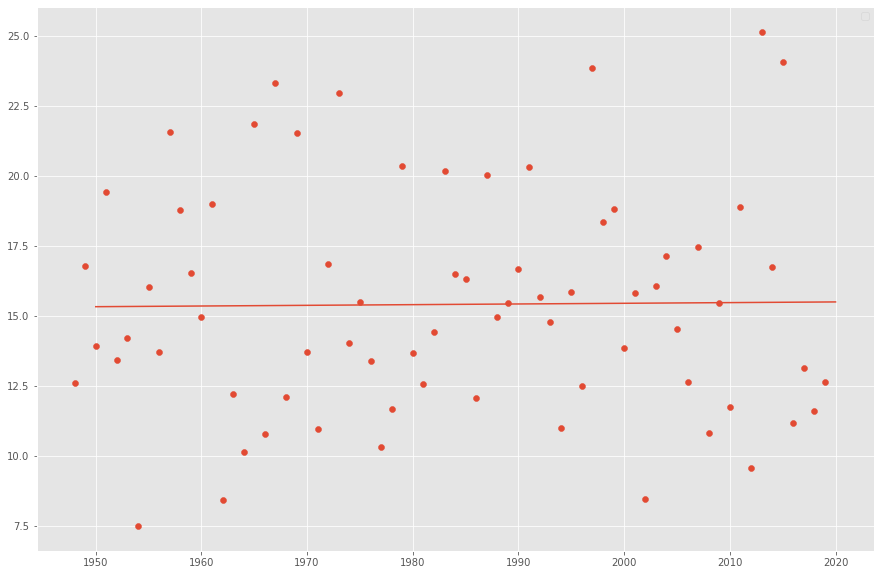

In [223]:
def count_non_zero(arr):
    return sum(arr>0.0)

df = PRCP_d
fig, ax = plt.subplots(1, figsize=(15,10))
yrs = list(range(df.startyr,2020))

Y = data_year_avg(ax, df.data_yr, yrs, aggfx=np.nansum)
#Y = data_year_avg(ax, TMIN_d.data_yr, r)

X = np.ones((len(yrs),2))
X[:,0] = yrs
model = OLS(Y, X)
results = model.fit()
params = results.params


X_mdl = np.linspace(1950,2020,100)
Y_mdl = X_mdl*params[0] + params[1]
ax.plot(X_mdl, Y_mdl)

ax.legend();

In [227]:
A = results.t_test([1, 0], use_t=False)
A

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0024      0.023      0.105      0.916      -0.043       0.048

In [231]:
A.

'norm'

In [237]:
CI = results.conf_int(alpha=0.05, cols=None)[0]

In [244]:
mdl_label = 'Fit Line, slope CI:[{:.4f},{:.4f}] @ p = {:.4f}'.format(CI[0], CI[1], 0.05)

In [252]:
"{:.4f}".format(0.05).rstrip('0')

'0.05'

In [246]:
mdl_label

'Fit Line, slope CI:[-0.0435,0.0483] @ p = 0.0500'